In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
data.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


# Train test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(data.drop('Purchased', axis =1),
                                                data['Purchased'],
                                                test_size = 0.3,
                                                random_state = 0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [10]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


# Effect of Scaling 

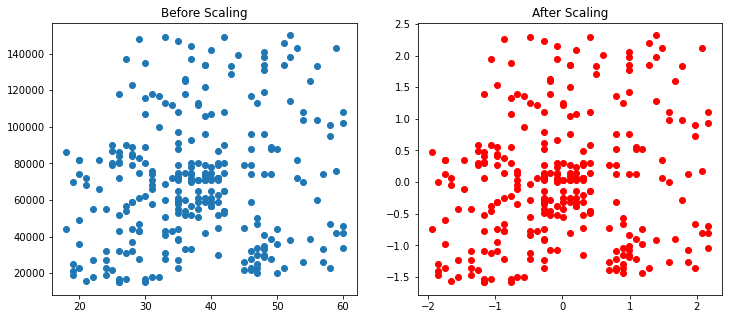

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title('After Scaling')
plt.show()

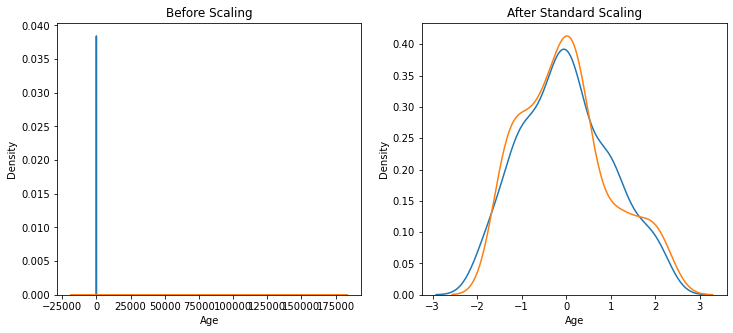

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#After Scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

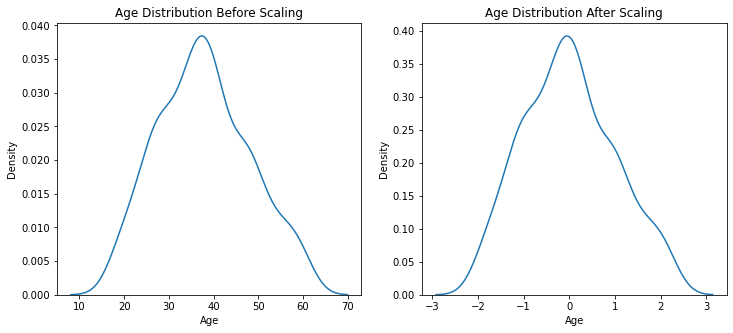

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

#before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

#After Scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

<AxesSubplot:title={'center':'Salary Distribution After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

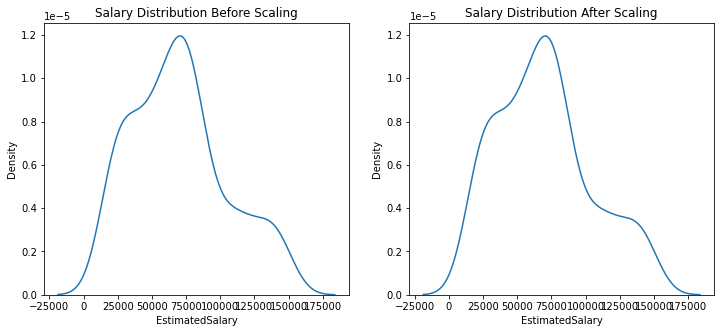

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

#Before Scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#After Scaling
ax2.set_title('Salary Distribution After Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax2)

# Why sacling is important ??

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
LR = LogisticRegression()

In [17]:
LR_scaled = LogisticRegression()

In [18]:
LR.fit(X_train,Y_train)
LR_scaled.fit(X_train_scaled, Y_train)

LogisticRegression()

In [19]:
Y_pred = LR.predict(X_test)
Y_pred_scaled = LR_scaled.predict(X_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print('Actual',accuracy_score(Y_test,Y_pred))
print('Scaled',accuracy_score(Y_test,Y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
DT = DecisionTreeClassifier()
DT_scaled = DecisionTreeClassifier()

In [24]:
DT.fit(X_train, Y_train)
DT_scaled.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [25]:
Y_pred = DT.predict(X_test)
Y_pred_scaled = DT_scaled.predict(X_test_scaled)

In [26]:
print('Actual',accuracy_score(Y_test,Y_pred))
print("Scaled",accuracy_score(Y_test,Y_pred_scaled))

Actual 0.875
Scaled 0.875


In [27]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [28]:
data = data.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

In [29]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


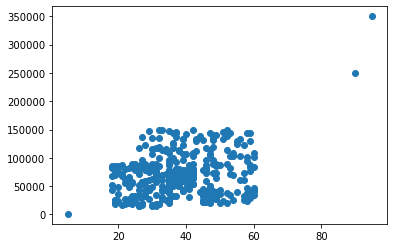

In [30]:
plt.scatter(data['Age'],data['EstimatedSalary'])

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data.drop('Purchased', axis =1),
                                                data['Purchased'],
                                                test_size = 0.3,
                                                random_state = 0)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
# fit the scaler to the train set, it will learn the  parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

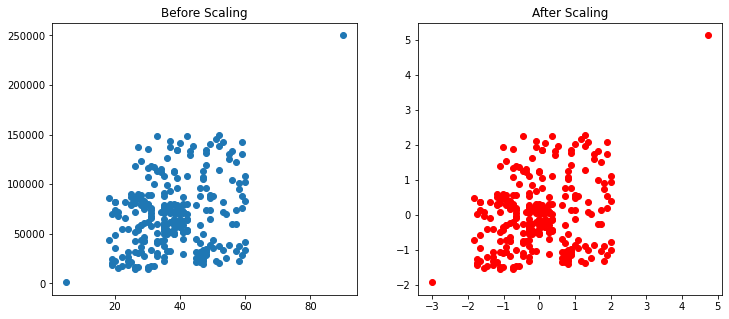

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title('After Scaling')
plt.show()